In [2]:
import os 
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

['csst_qso_060_z3.07_mid.fits', 'csst_qso_056_z2.95_mid.fits', 'csst_qso_038_z1.20_high.fits', 'csst_qso_071_z1.24_low.fits', 'csst_qso_003_z2.71_high.fits', 'csst_qso_053_z3.07_mid.fits', 'csst_qso_061_z1.31_mid.fits', 'csst_qso_052_z2.60_mid.fits', 'csst_qso_097_z3.36_low.fits', 'csst_qso_022_z2.81_high.fits', 'csst_qso_055_z2.93_mid.fits', 'csst_qso_064_z1.07_mid.fits', 'csst_qso_074_z2.39_low.fits', 'csst_qso_015_z2.36_high.fits', 'csst_qso_000_z2.67_high.fits', 'csst_qso_011_z2.72_high.fits', 'csst_qso_028_z2.44_high.fits', 'csst_qso_044_z2.73_mid.fits', 'csst_qso_082_z1.20_low.fits', 'csst_qso_079_z3.10_low.fits', 'csst_qso_047_z1.59_mid.fits', 'csst_qso_062_z2.55_mid.fits', 'csst_qso_034_z2.02_high.fits', 'csst_qso_069_z1.24_mid.fits', 'csst_qso_045_z2.67_mid.fits', 'csst_qso_081_z2.11_low.fits', 'csst_qso_093_z2.83_low.fits', 'csst_qso_065_z2.47_mid.fits', 'csst_qso_009_z1.84_high.fits', 'csst_qso_086_z1.20_low.fits', 'csst_qso_095_z2.50_low.fits', 'csst_qso_001_z2.97_high.fits

/tmp/ipykernel_14978/1705295428.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 3))


z: 2.83, id: 093
/home/wbc/code/llm-spectro-agent/data/mock_set1/csst_qso_093_z2.83_low.fits
Filename: /home/wbc/code/llm-spectro-agent/data/mock_set1/csst_qso_093_z2.83_low.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  WAVELENGTH    1 ImageHDU         7   (2774,)   float32   
  2  FLUX          1 ImageHDU         7   (2774,)   float32   
  3  FLUX_RAW      1 ImageHDU         7   (2774,)   float32   
None
z: 2.47, id: 065
/home/wbc/code/llm-spectro-agent/data/mock_set1/csst_qso_065_z2.47_mid.fits
Filename: /home/wbc/code/llm-spectro-agent/data/mock_set1/csst_qso_065_z2.47_mid.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  WAVELENGTH    1 ImageHDU         7   (2774,)   float32   
  2  FLUX          1 ImageHDU         7   (2774,)   float32   
  3  FLUX_RAW      1 ImageHDU         7   (2774,)   float32   
None
z: 1.84, id: 009
/home/wbc/c

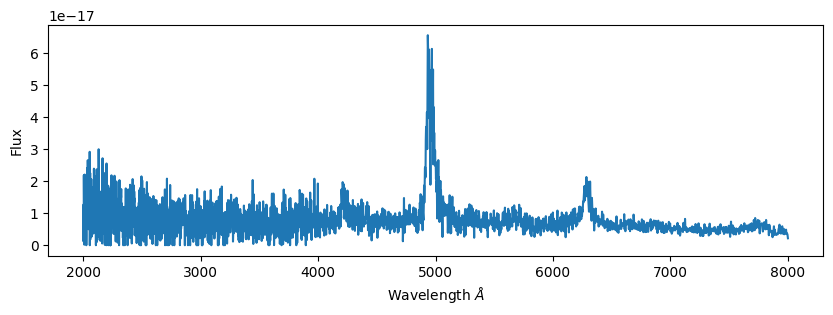

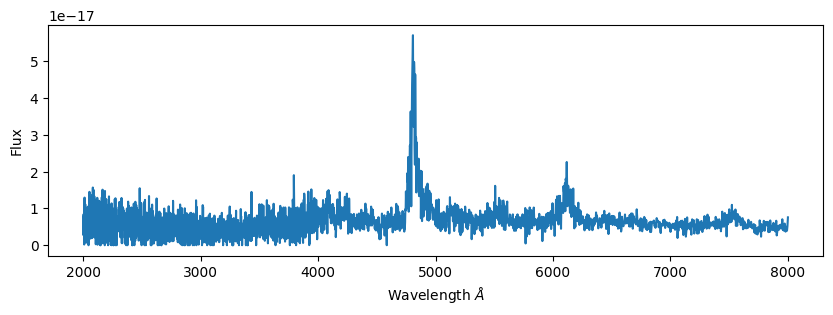

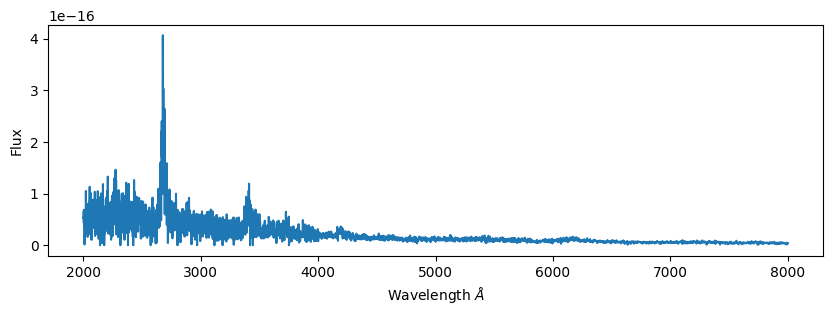

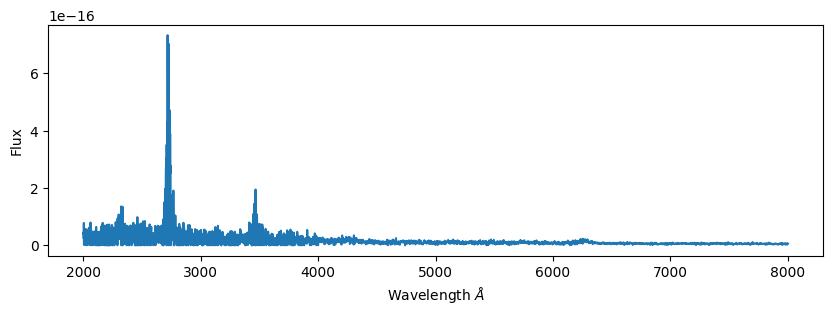

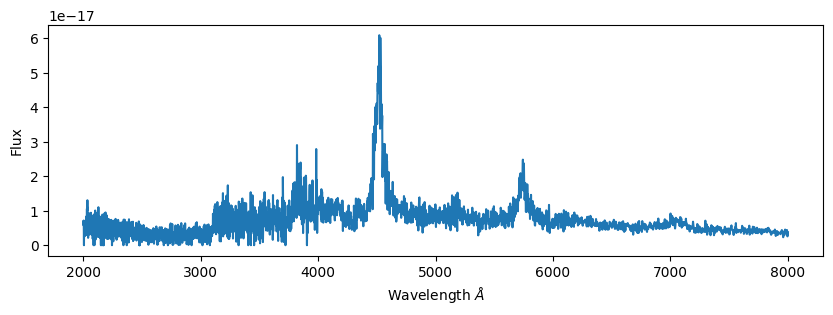

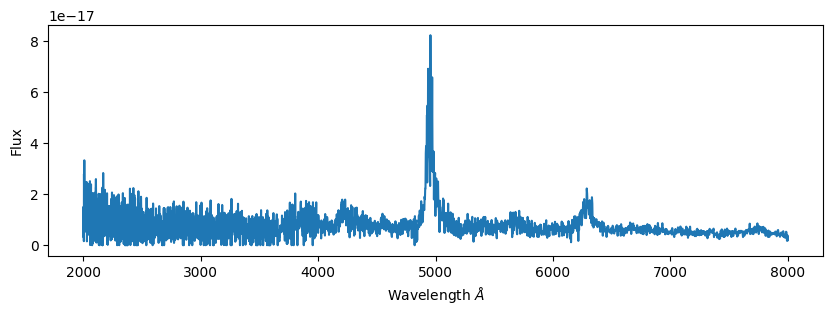

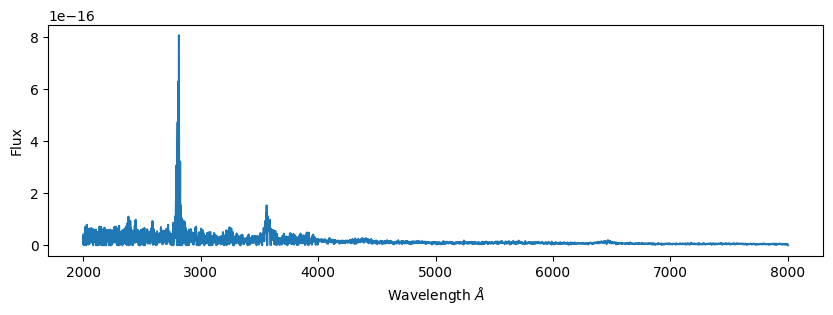

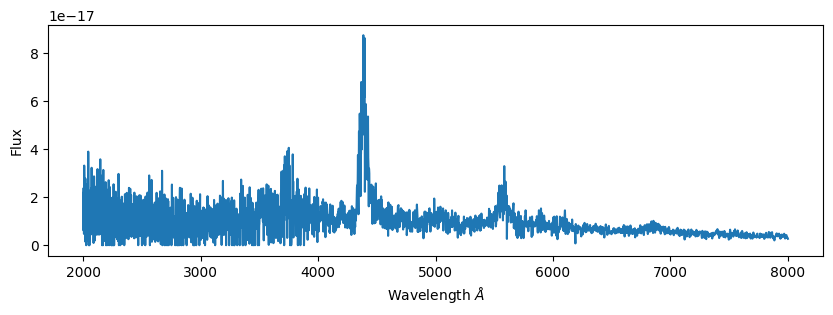

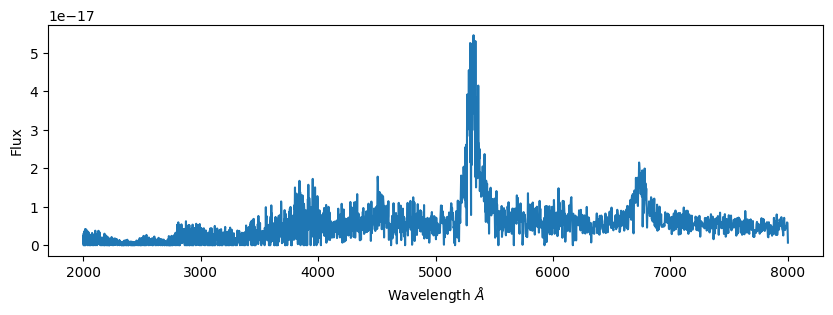

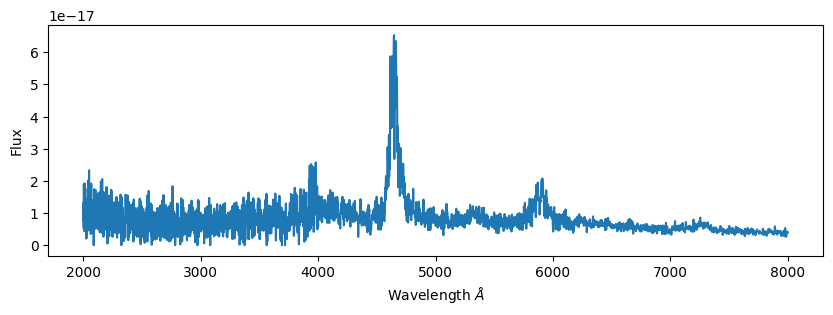

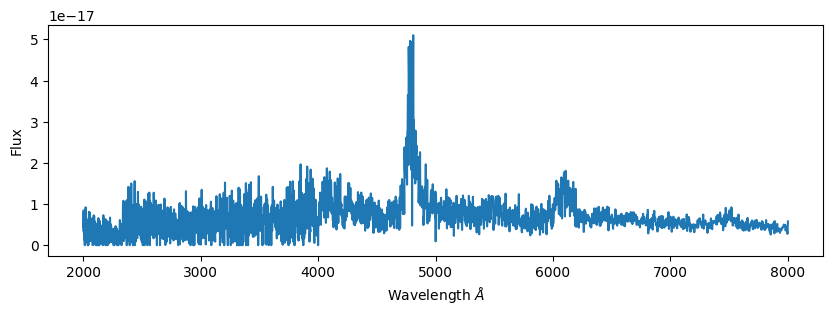

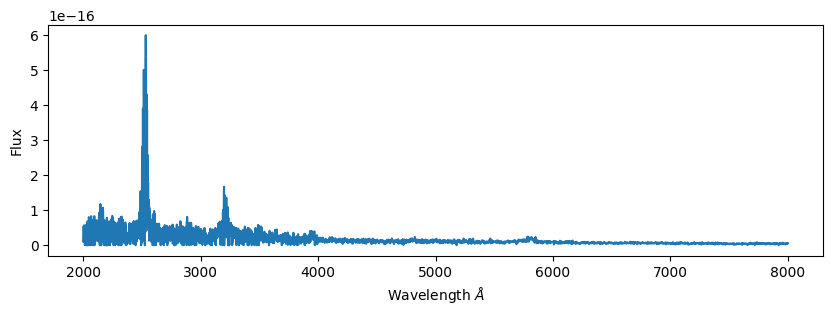

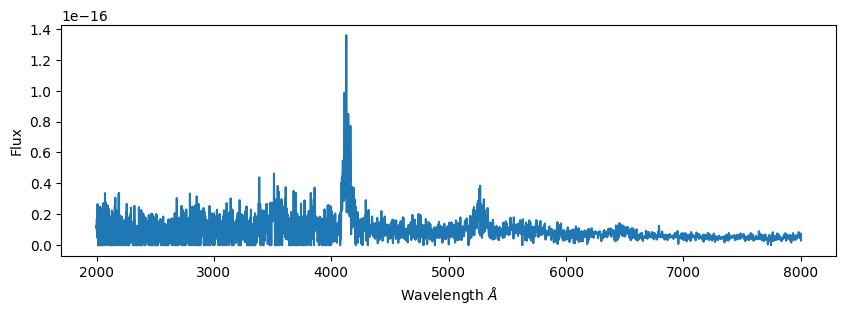

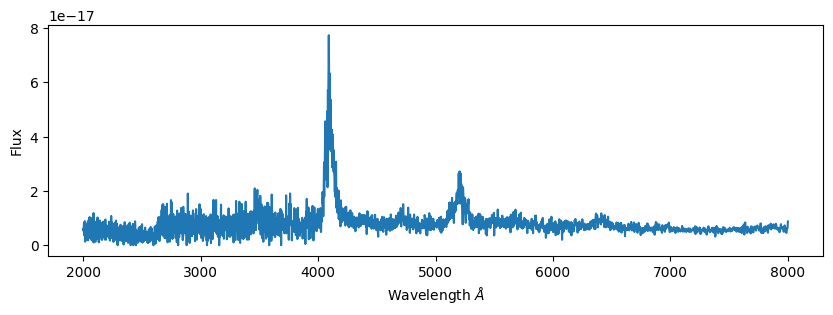

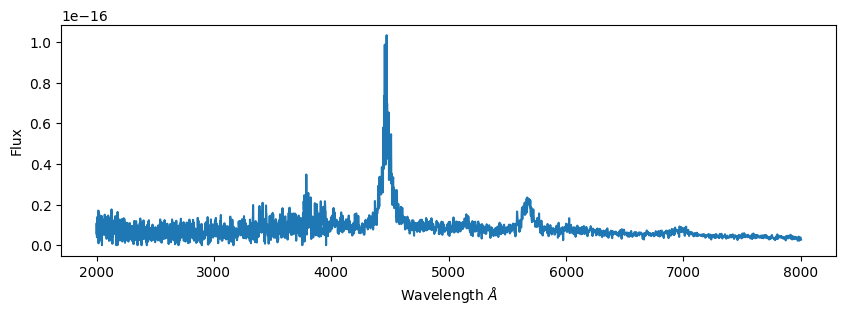

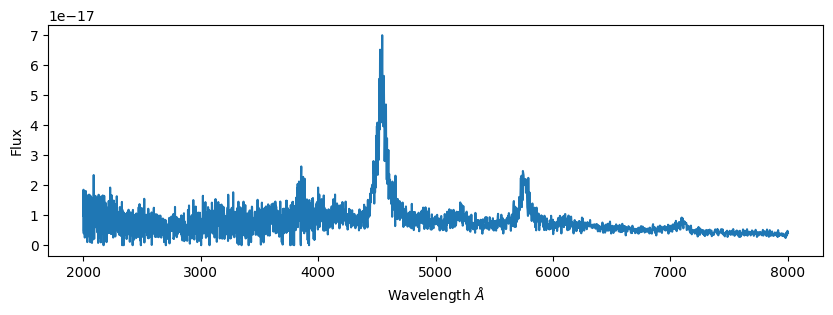

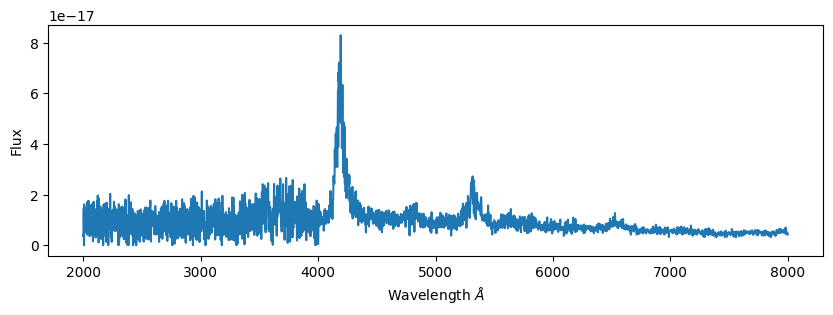

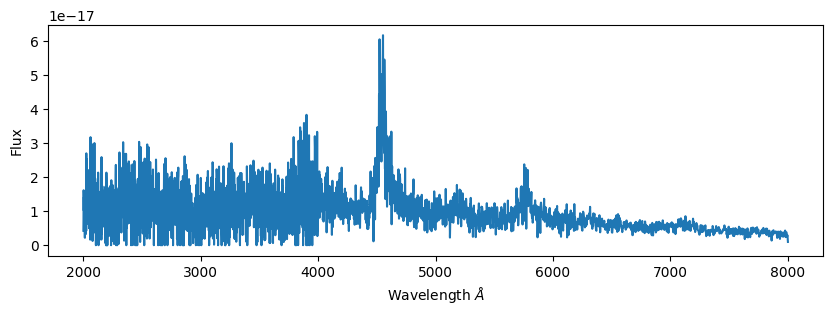

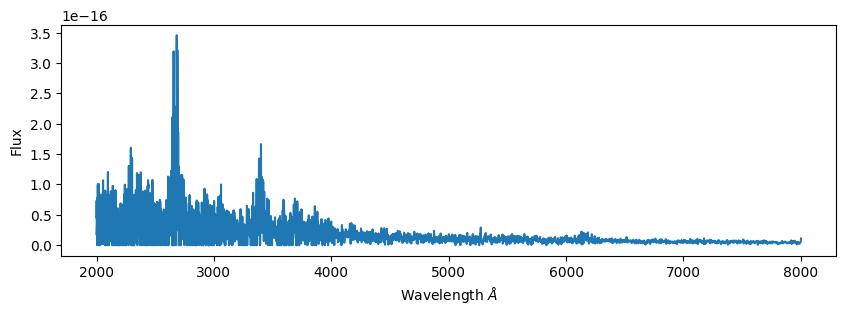

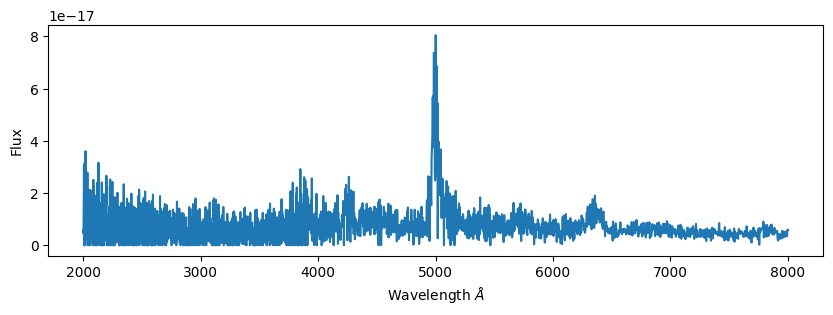

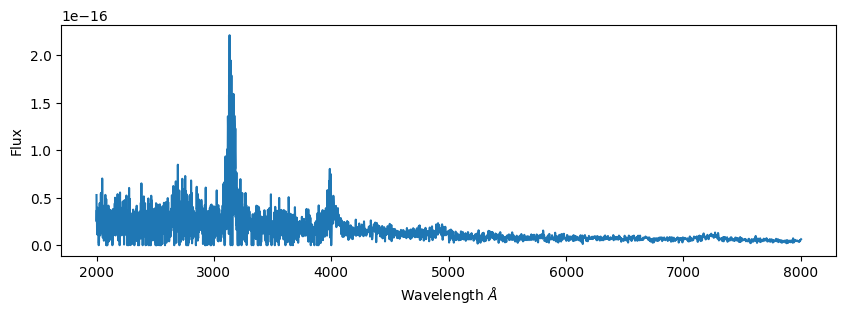

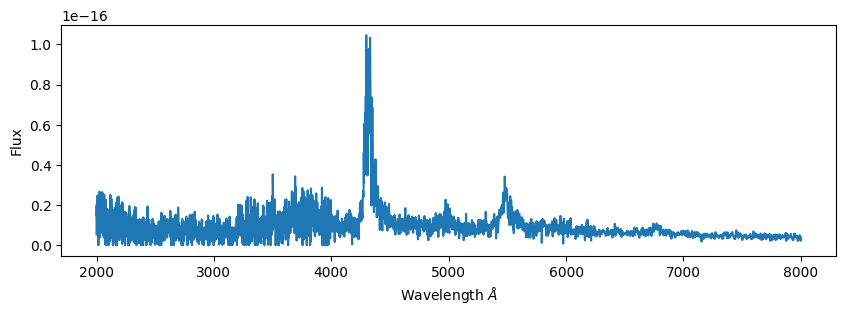

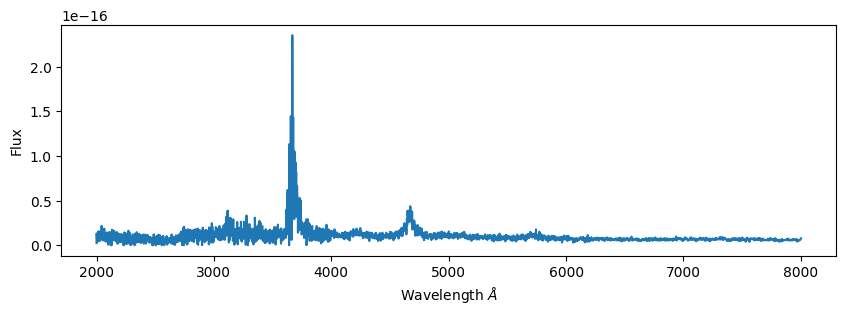

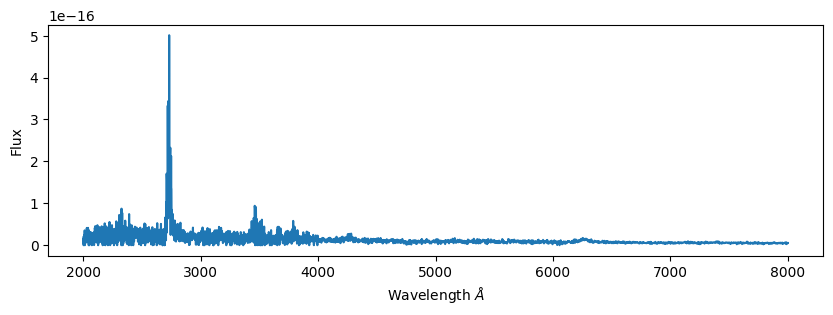

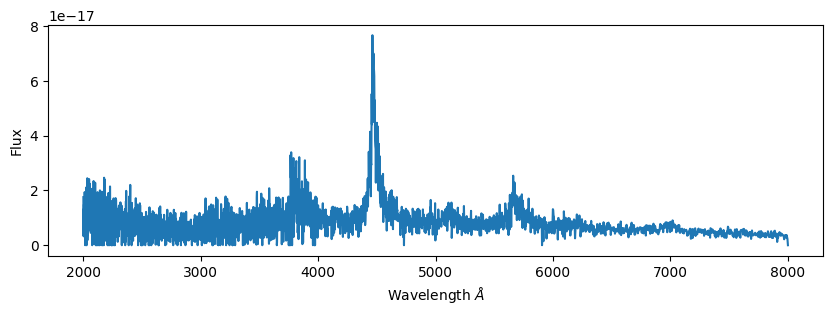

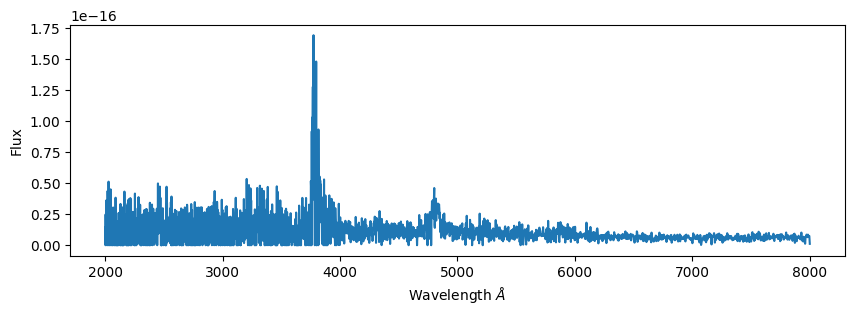

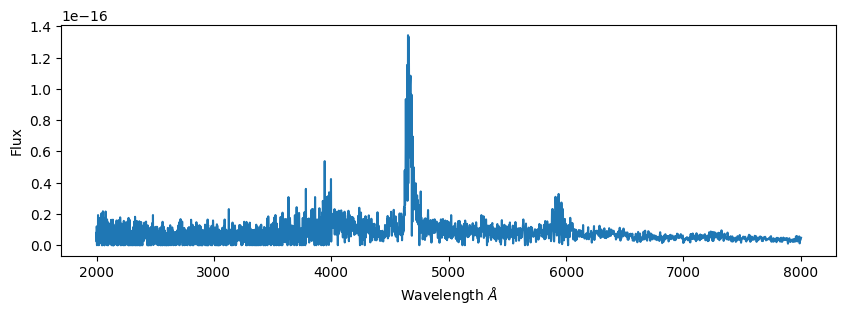

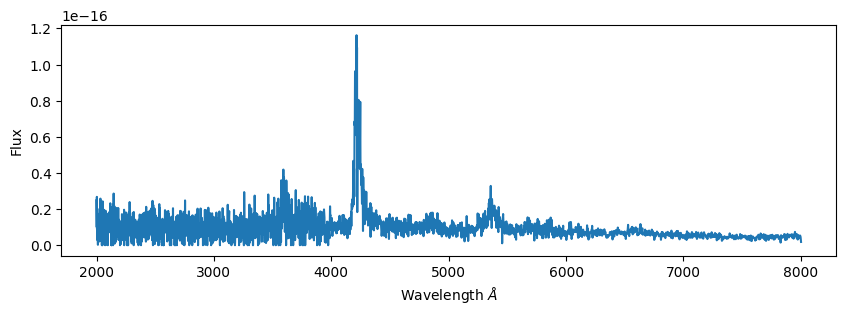

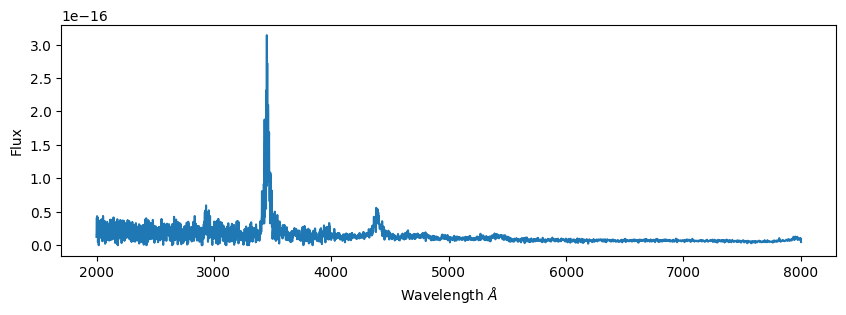

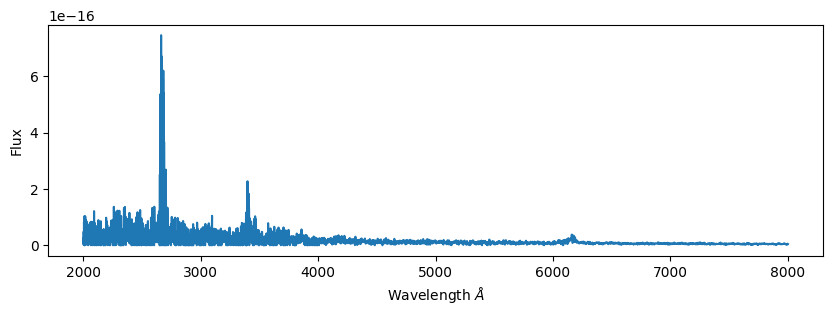

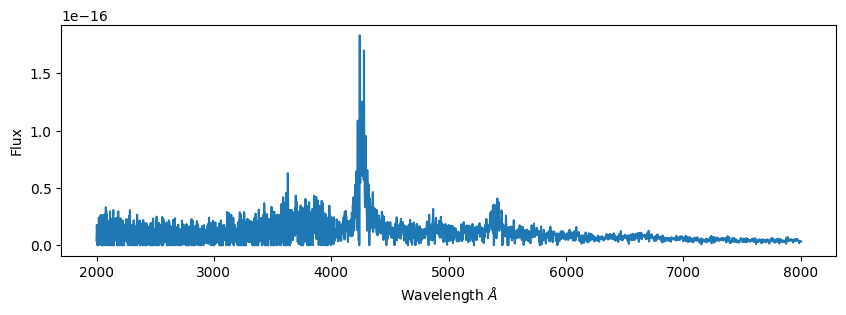

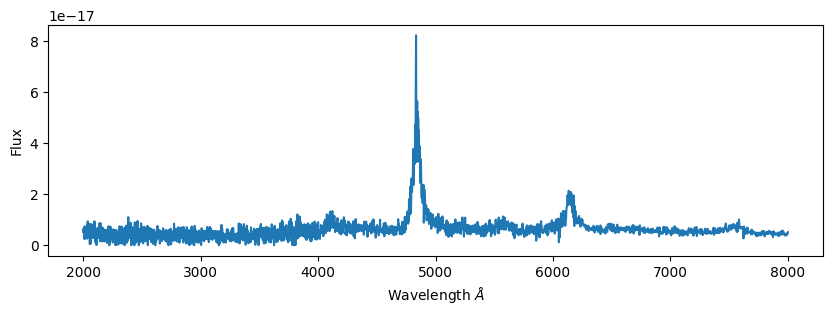

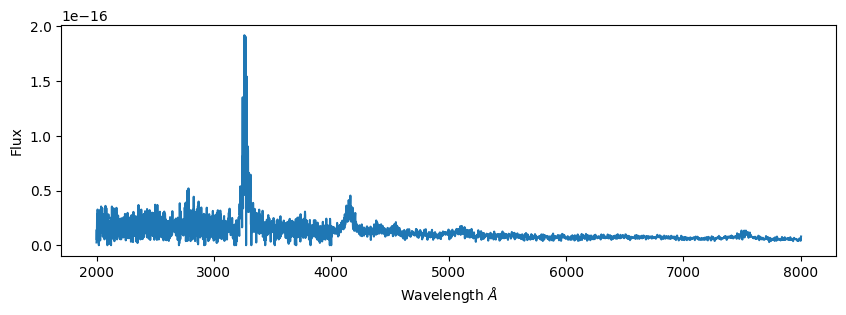

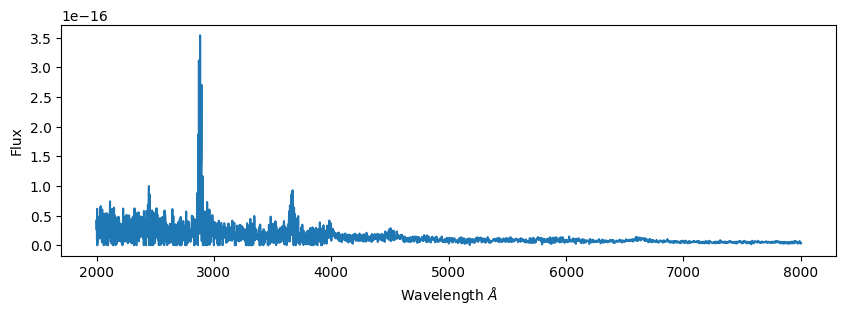

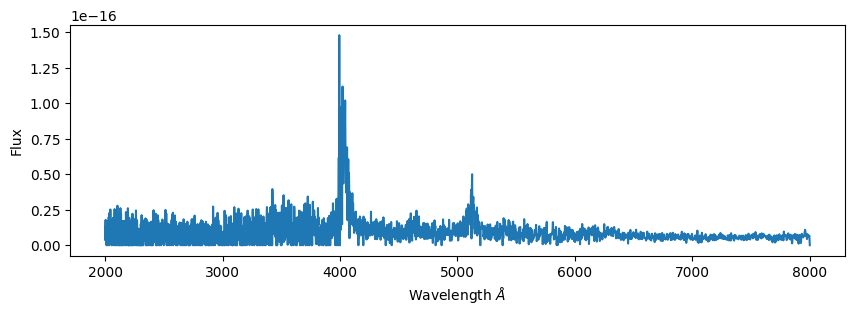

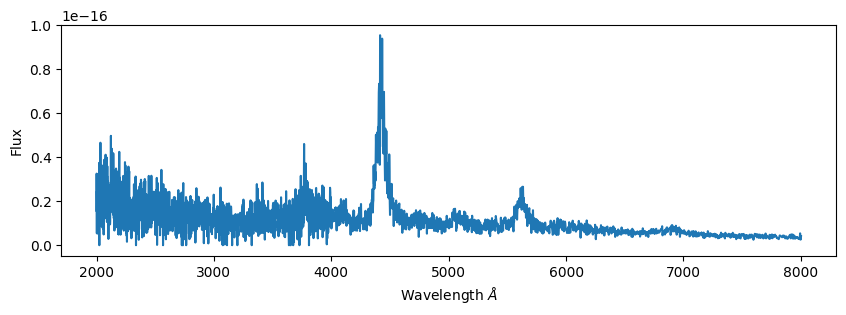

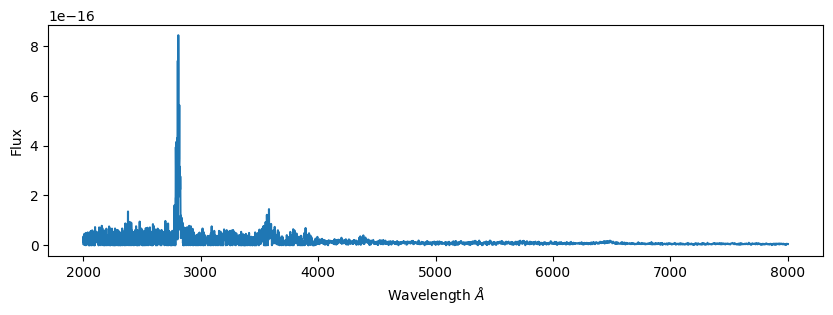

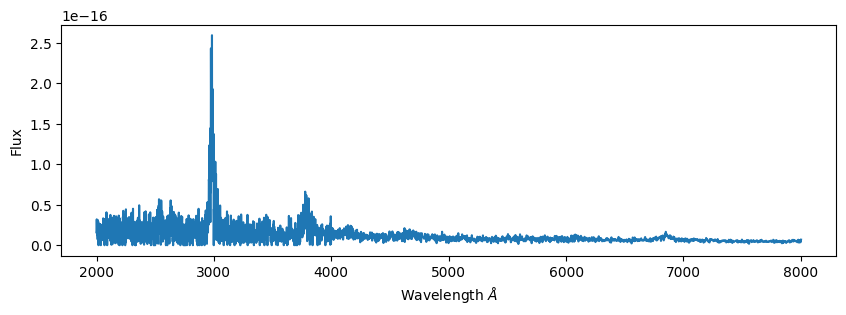

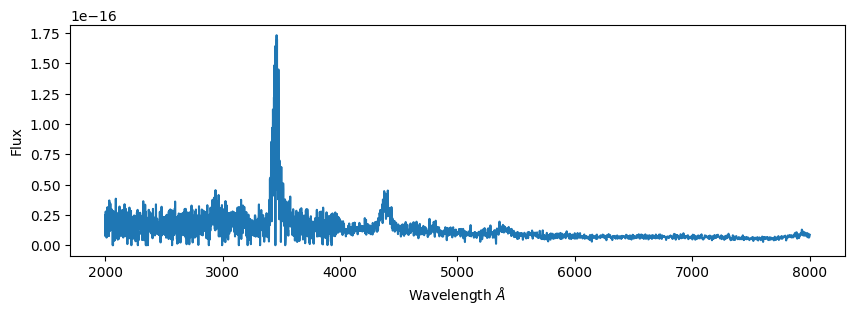

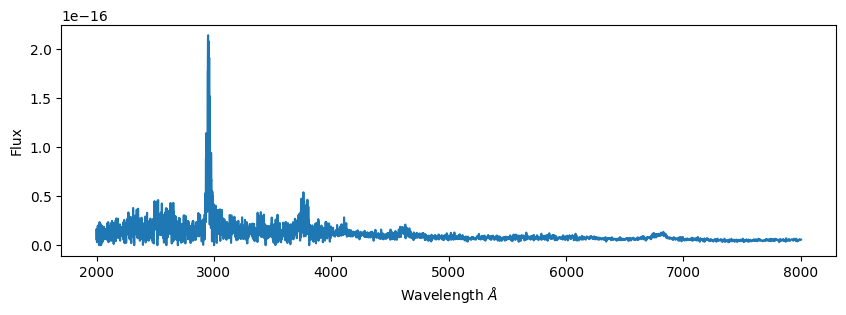

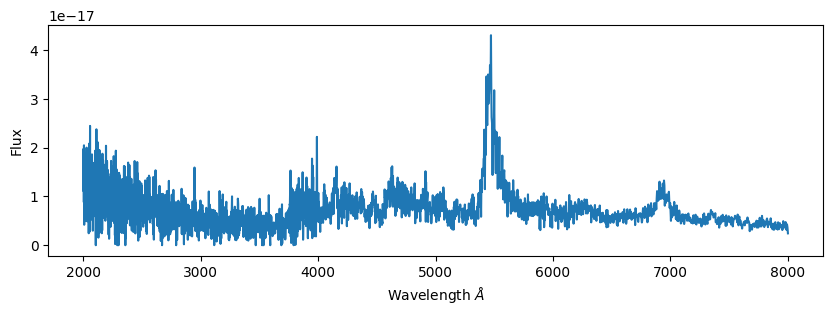

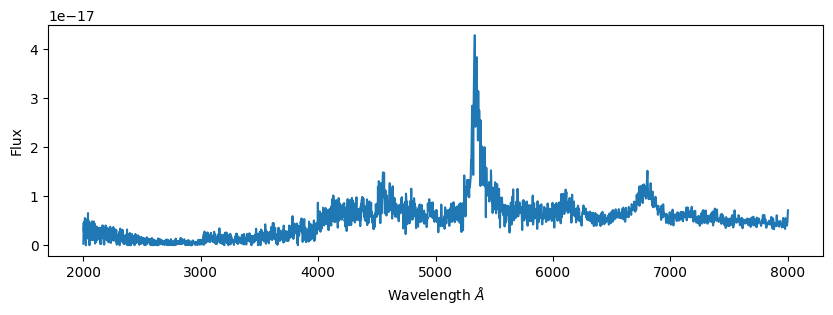

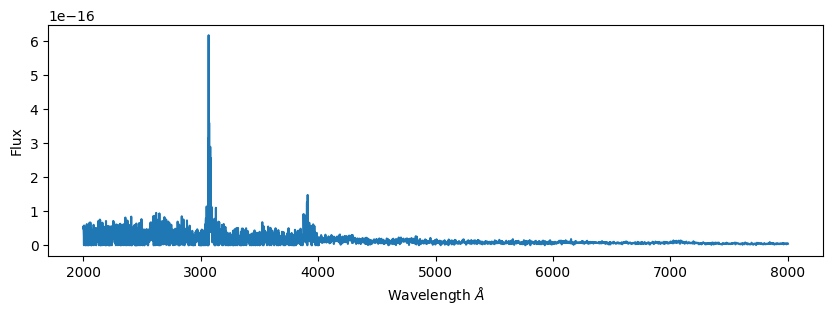

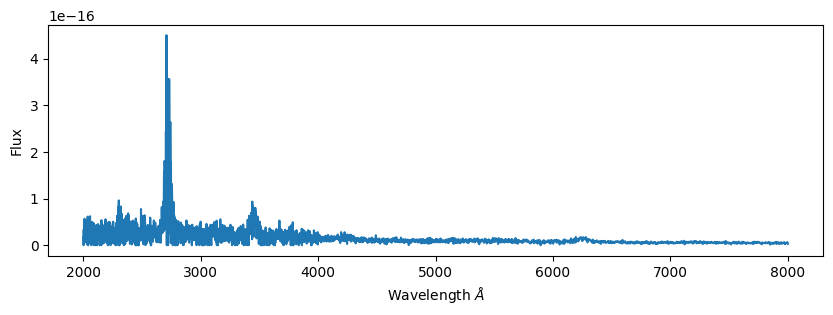

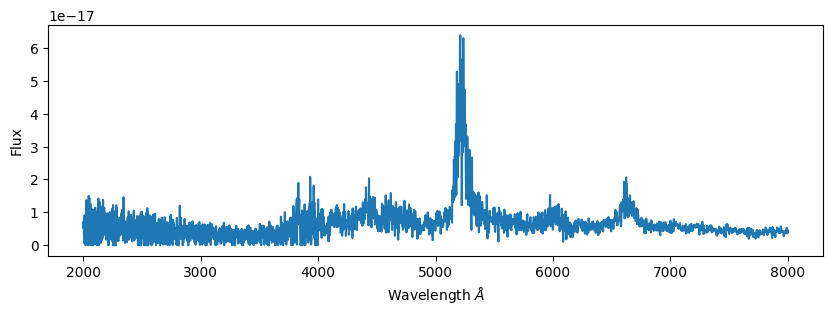

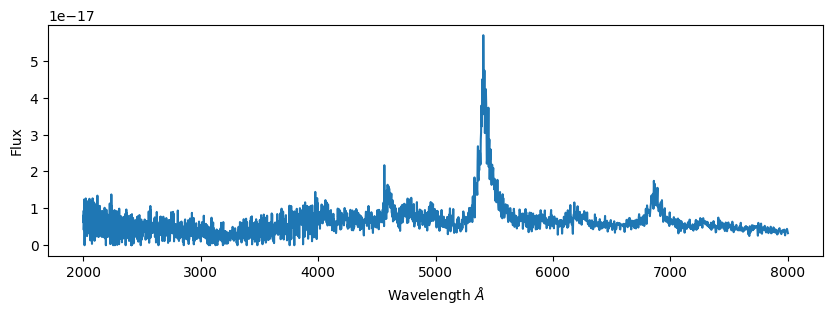

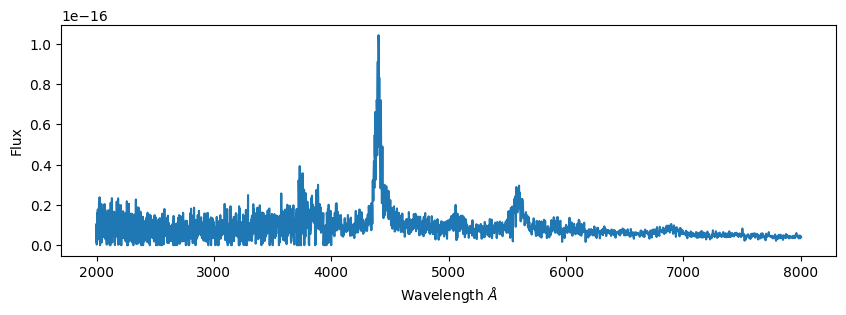

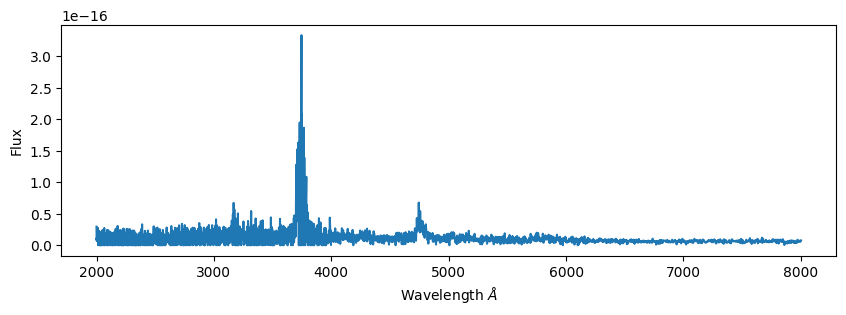

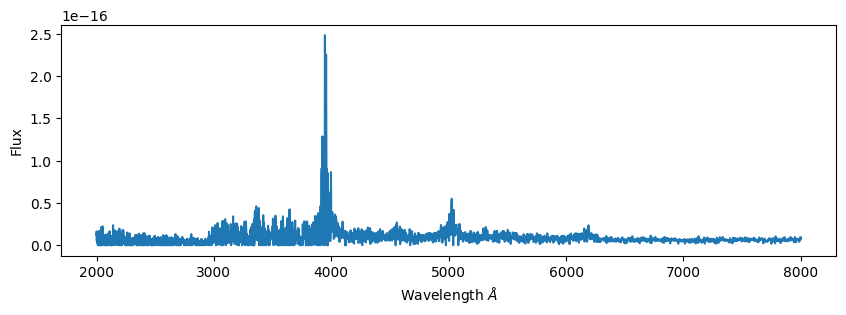

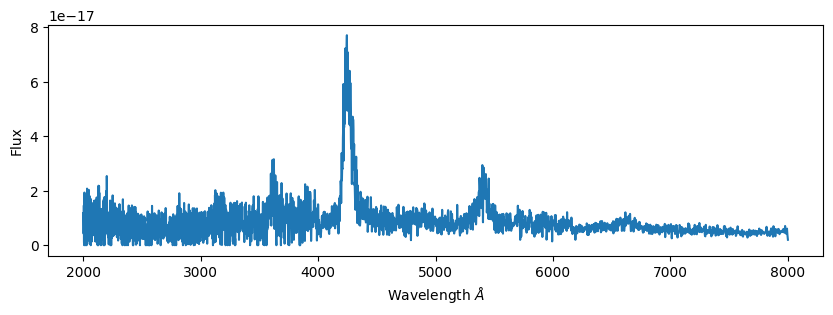

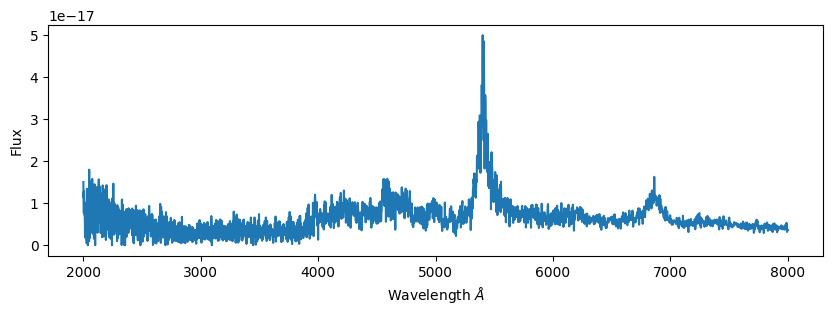

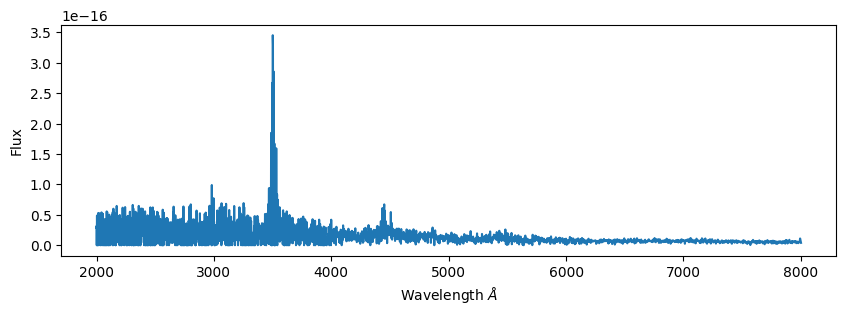

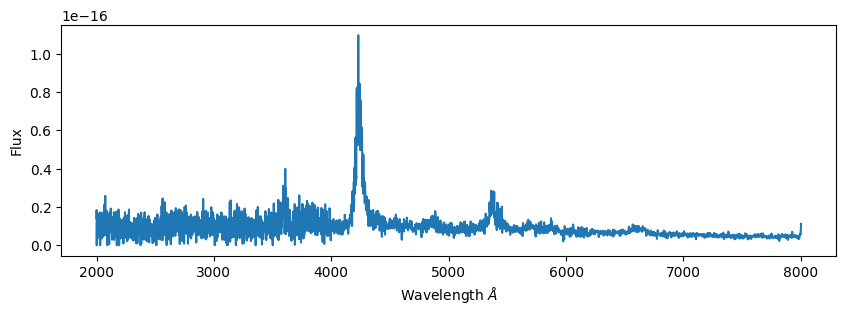

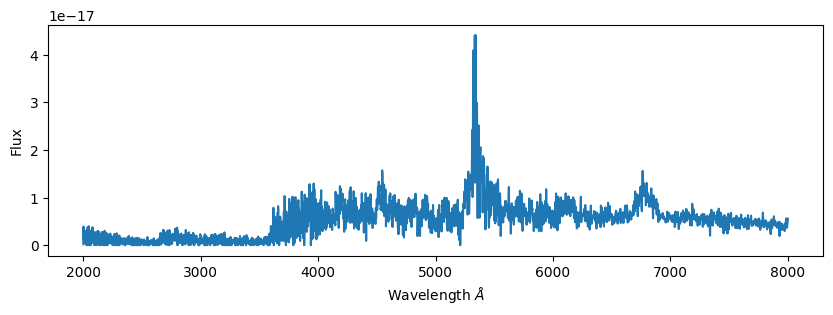

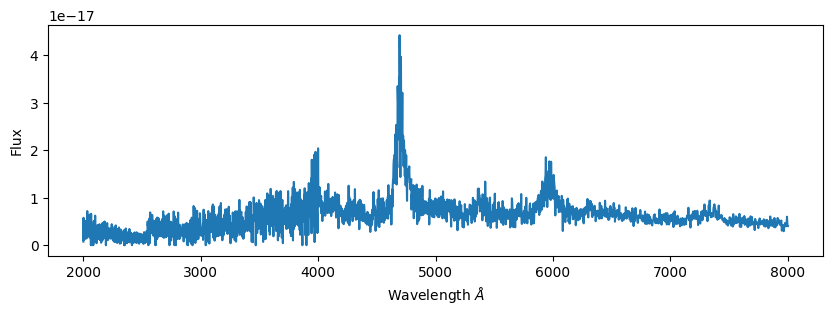

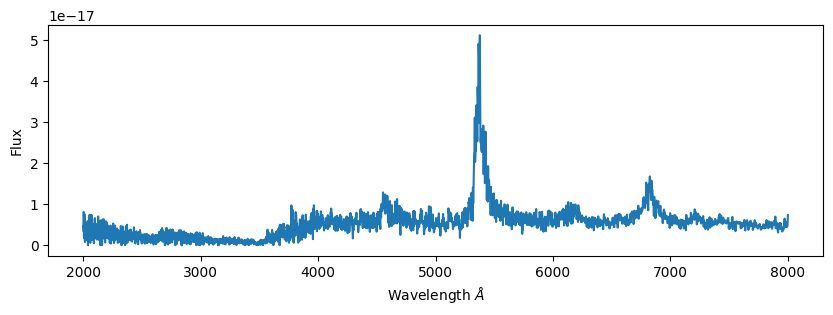

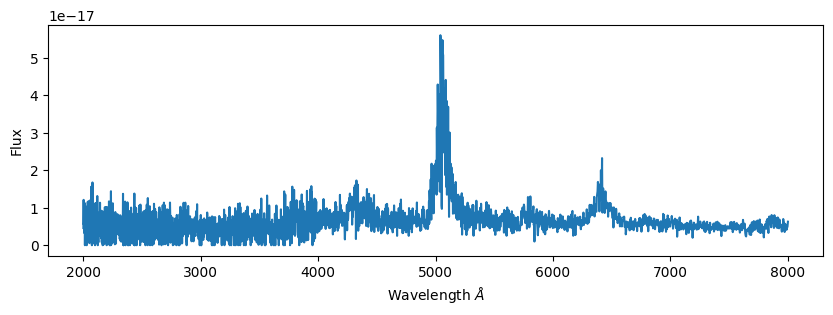

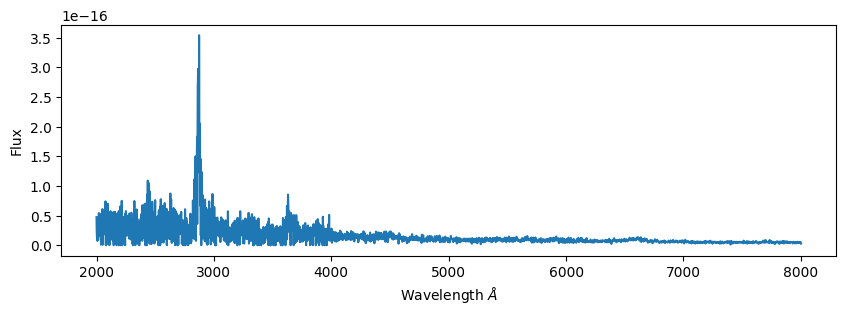

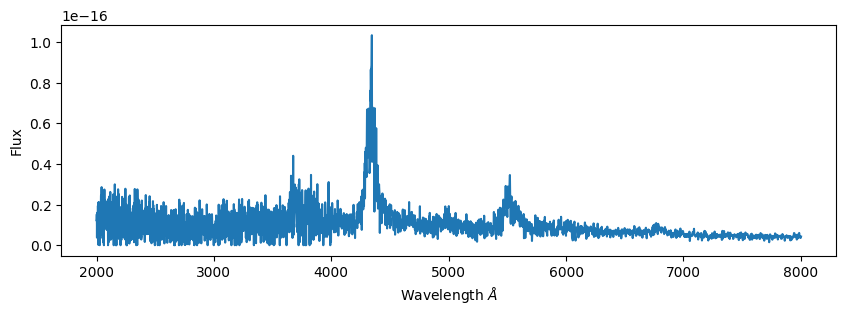

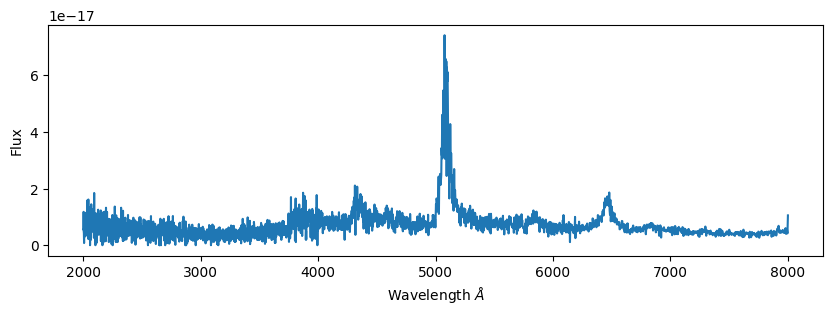

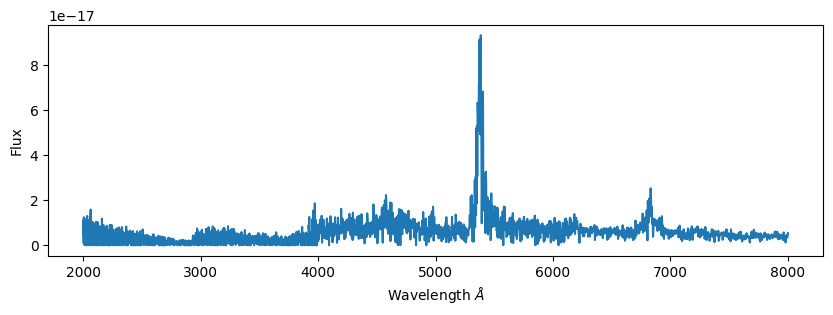

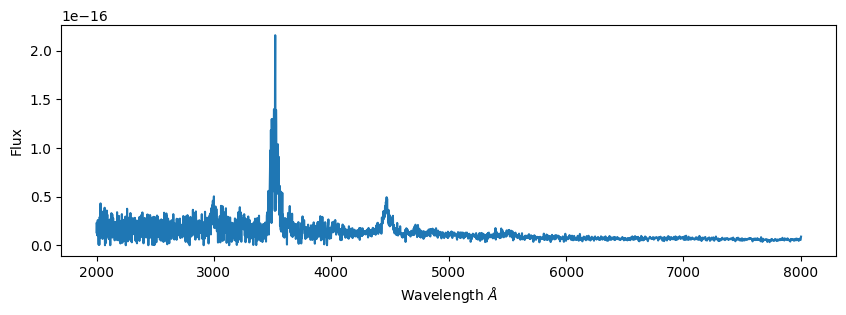

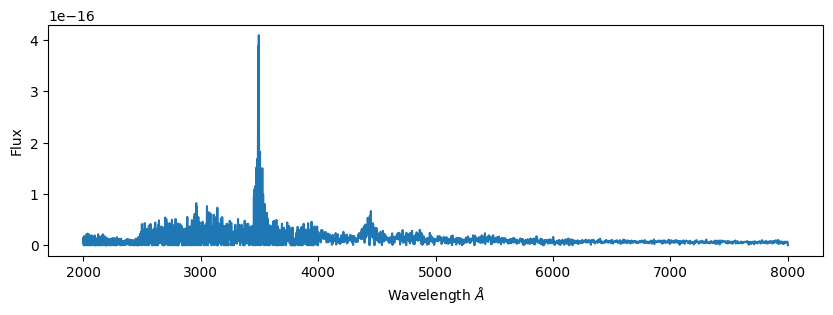

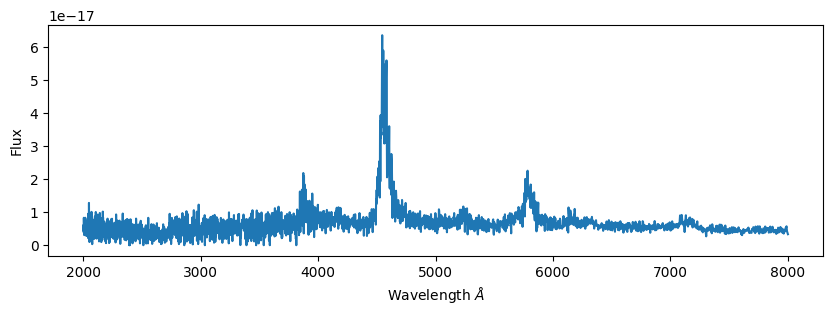

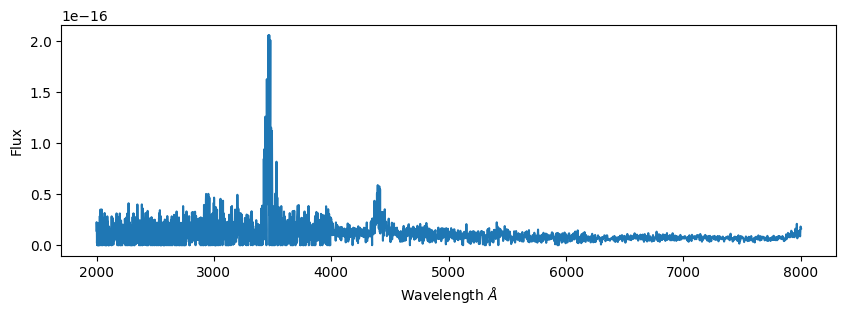

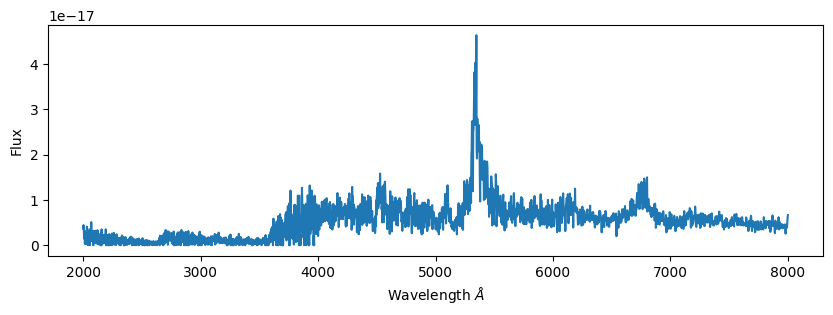

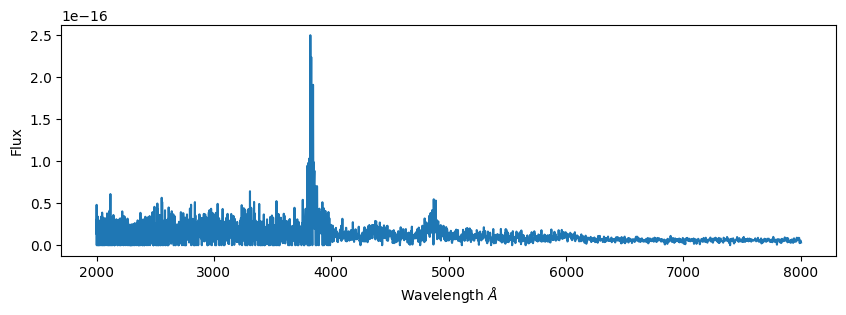

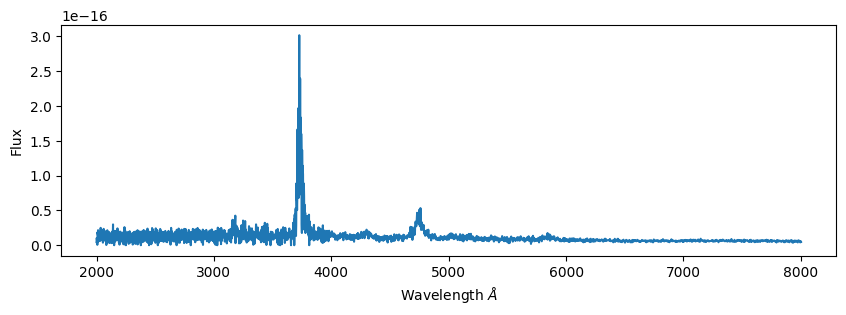

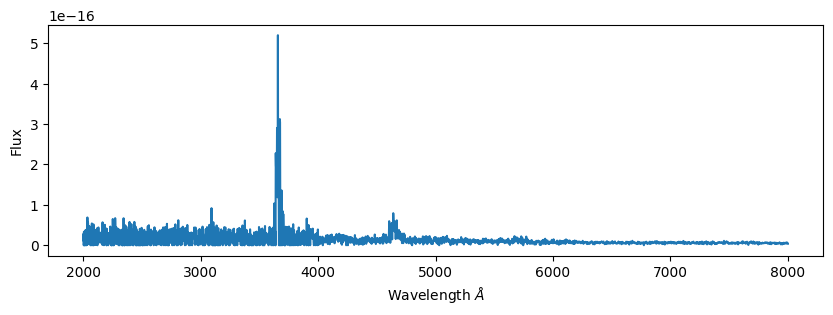

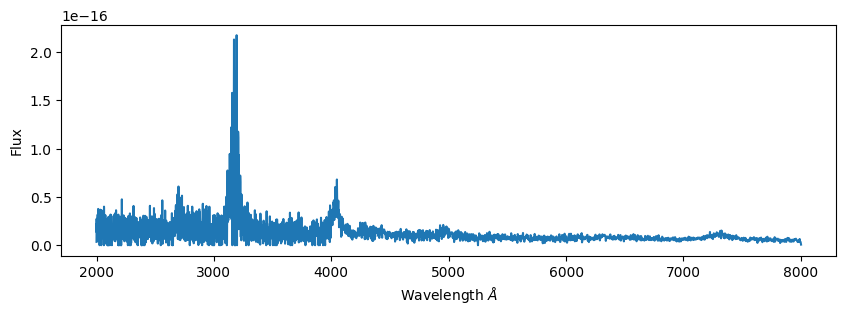

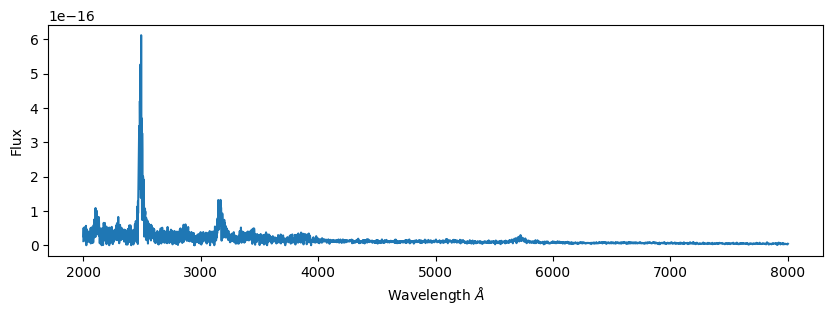

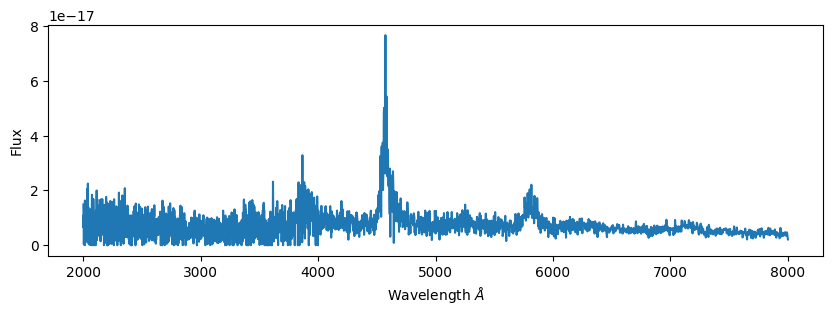

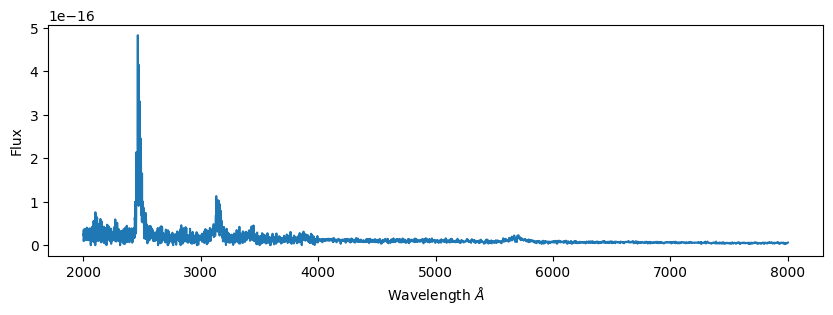

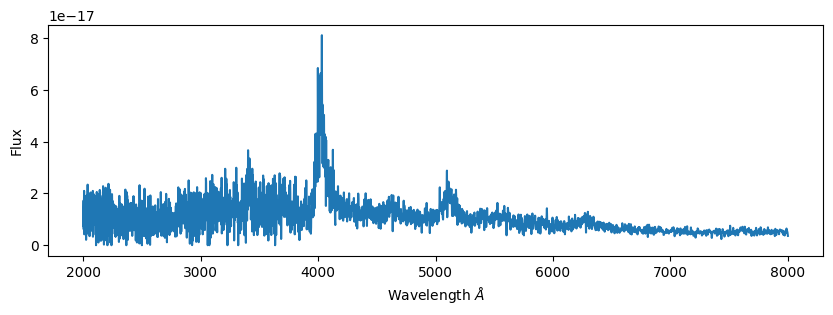

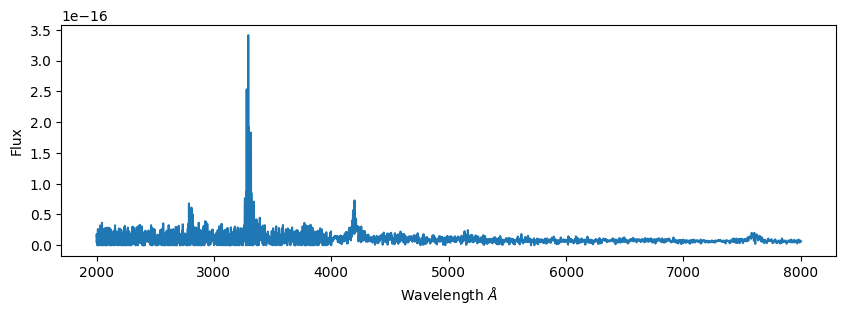

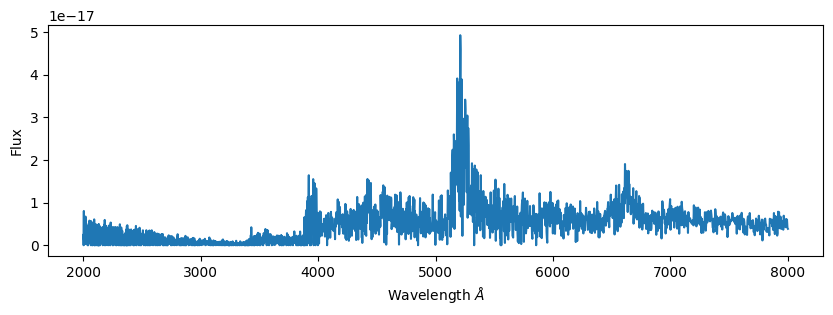

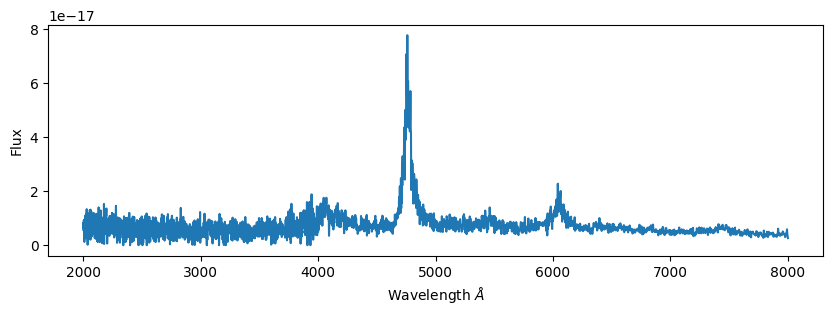

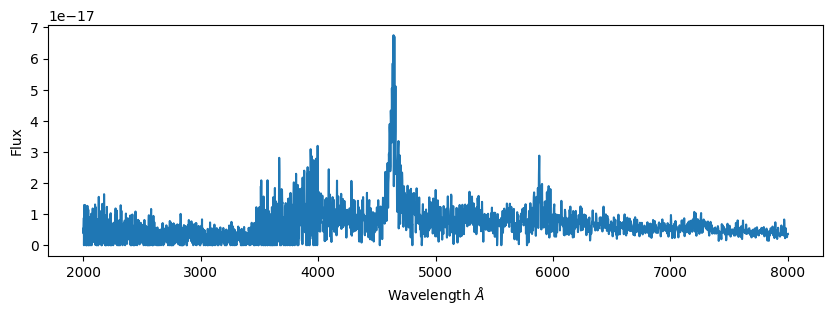

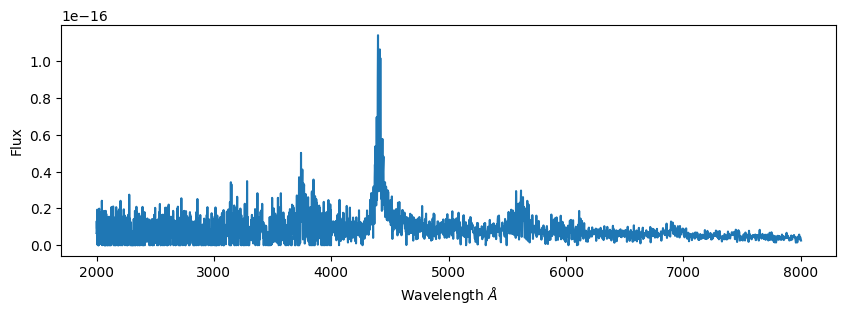

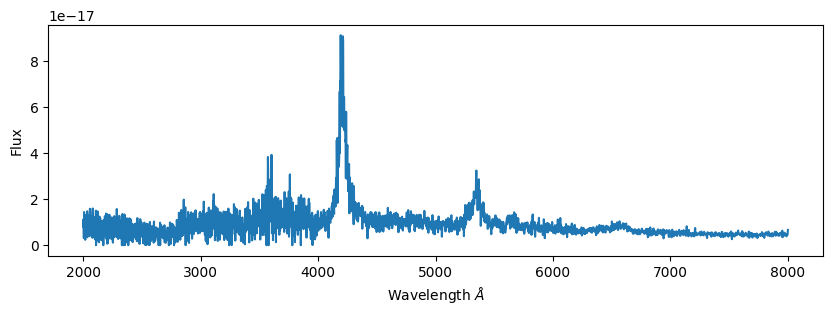

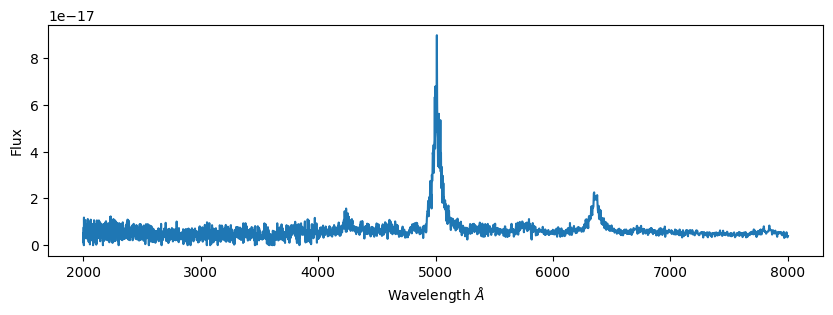

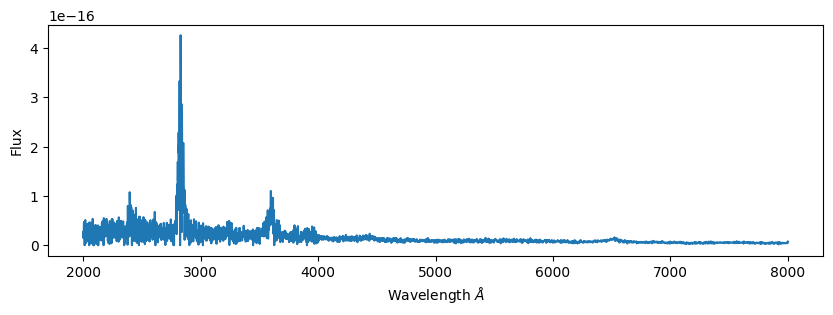

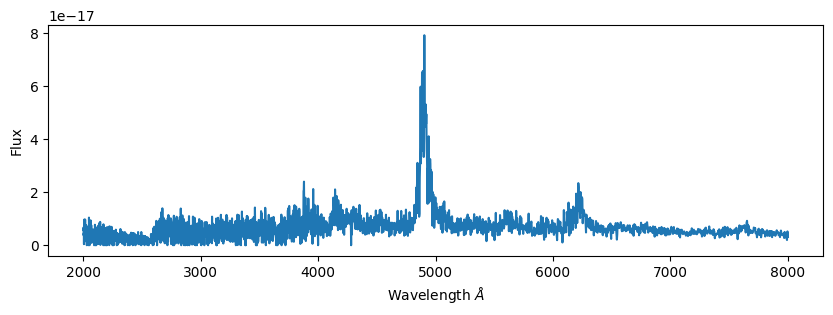

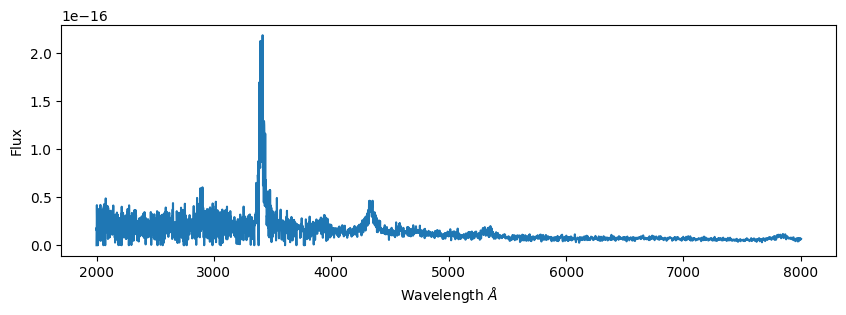

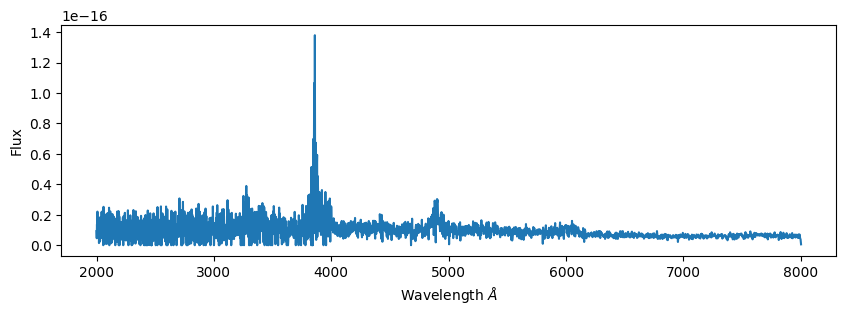

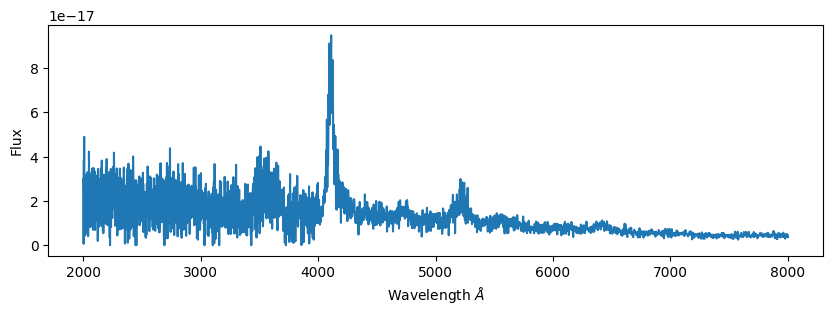

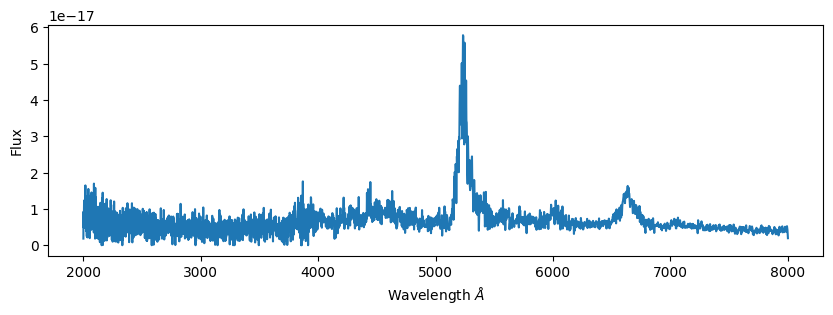

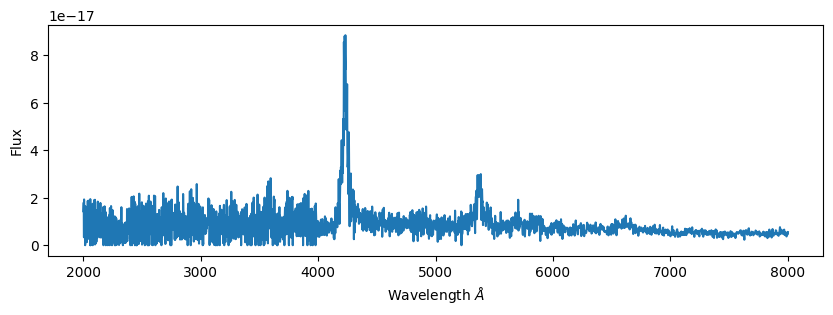

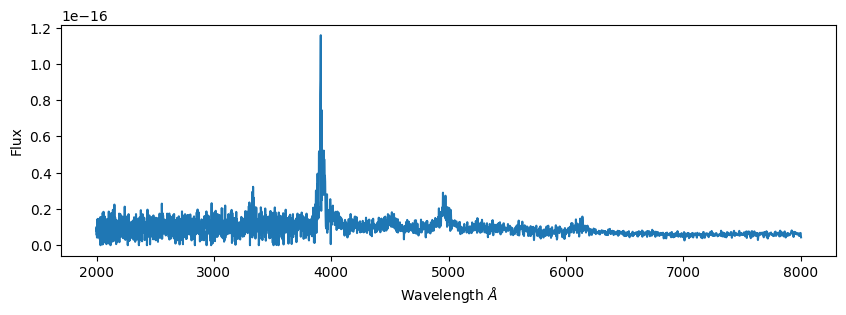

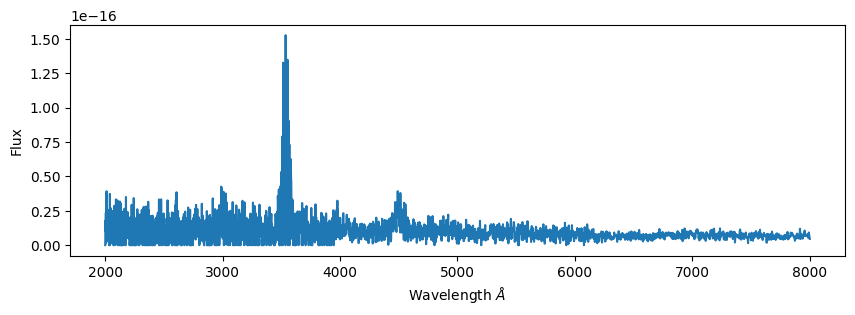

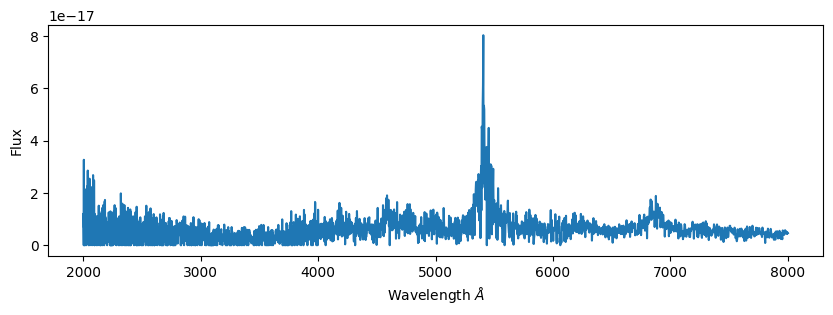

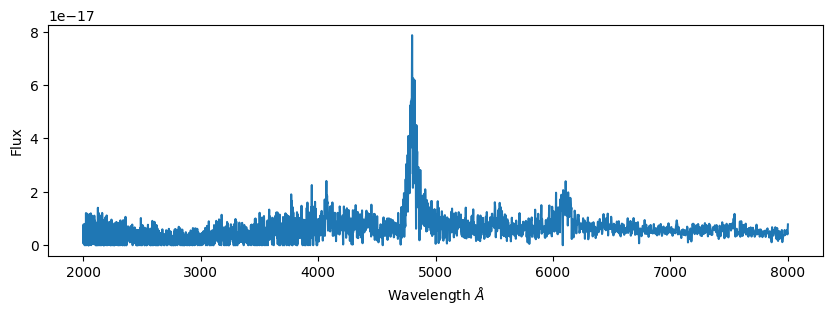

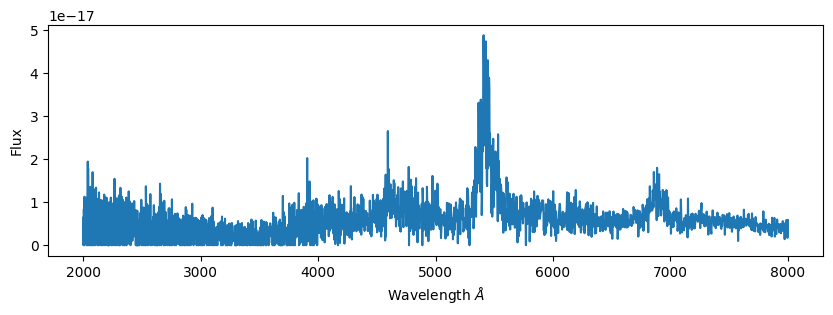

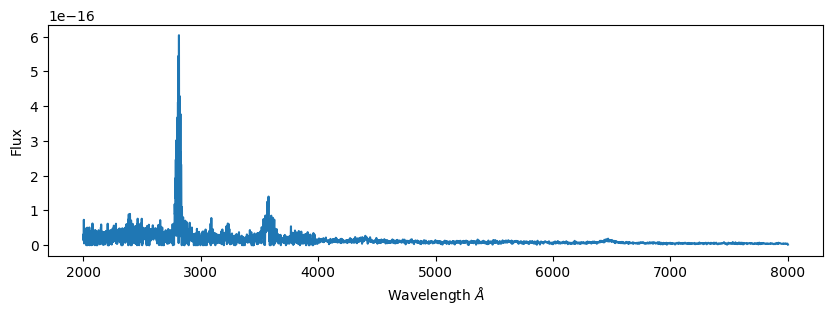

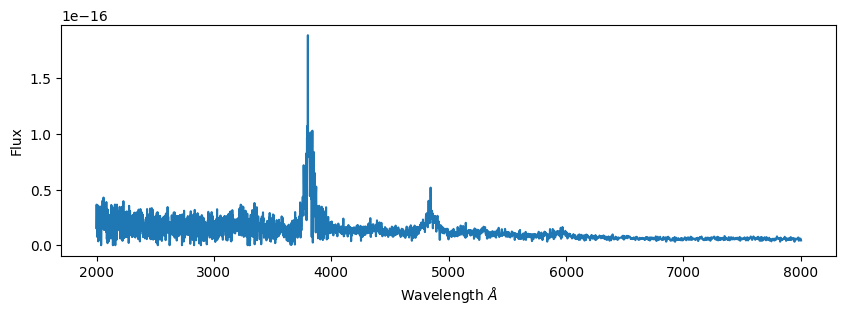

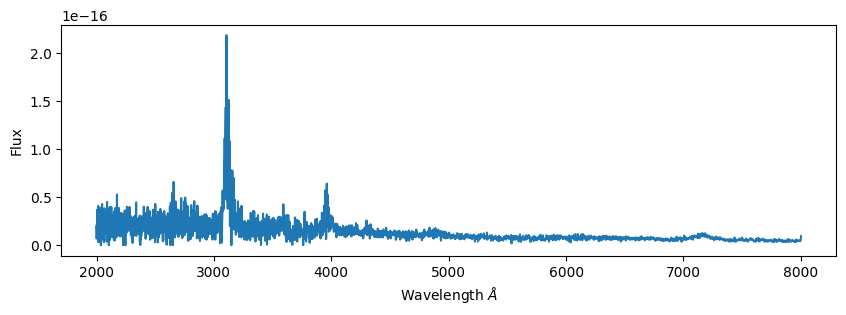

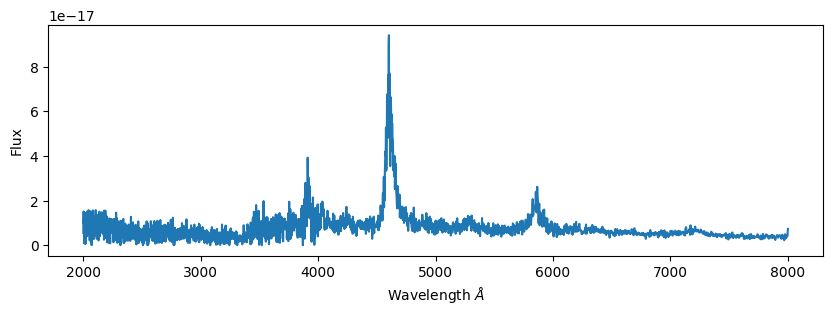

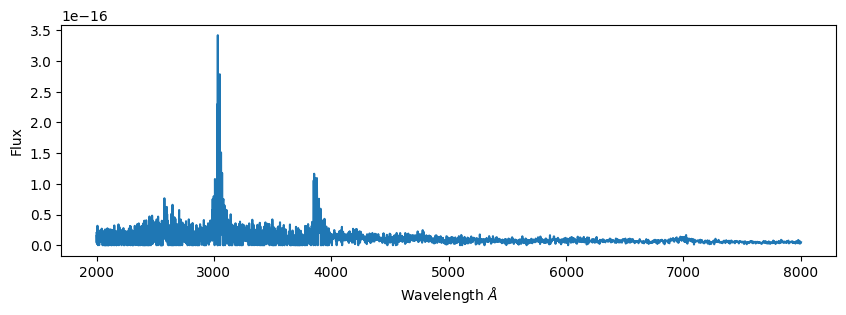

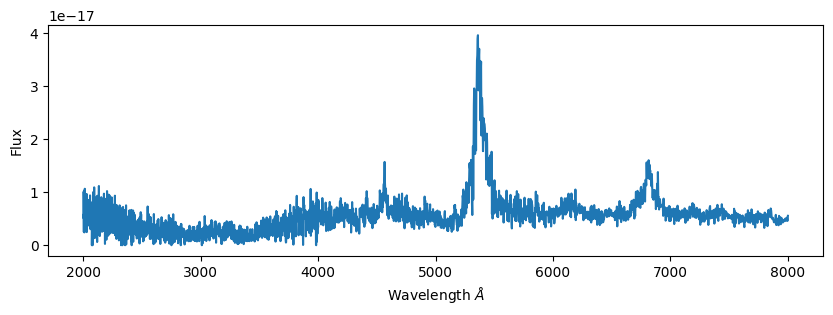

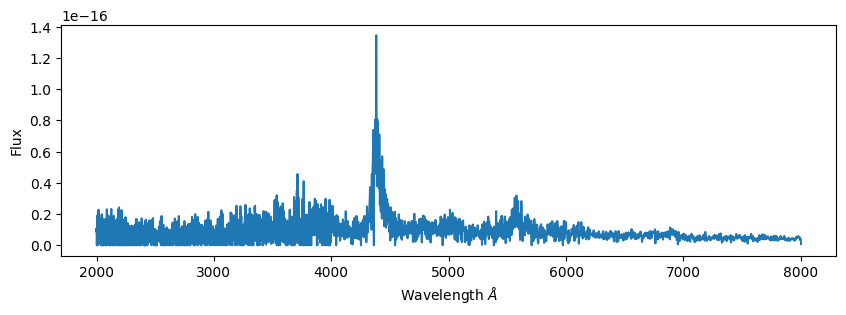

In [3]:
dir = '/home/wbc/code/llm-spectro-agent/data/mock_set1/'
# 检测目录中以fits结尾的文件
fits_files = [f for f in os.listdir(dir) if f.endswith('.fits') and f.startswith('csst')]
print(fits_files)
for i in fits_files:
    # i 是一个形如 ‘csst_qso_000_z2.67_high.fits’ 的字符串，我希望提取出000和2.67
    # 使用正则表达式提取出000和2.67
    import re
    match = re.search(r'(\d+)_z(\d+\.\d+)_', i)
    if match:
        z = match.group(2)
        id = match.group(1)
        print(f'z: {z}, id: {id}')
    fits_path = os.path.join(dir, i)
    print(fits_path)
    with fits.open(fits_path) as hdul:
        print(hdul.info())
        wavelength = hdul[1].data
        flux = hdul[2].data
        flux_raw = hdul[3].data
        # 关闭hdul
    hdul.close()

    fig = plt.figure(figsize=(10, 3))
    plt.plot(wavelength, flux)
    plt.ylabel('Flux')
    plt.xlabel(r'Wavelength $\AA$')
    fig.savefig(f'/home/wbc/code/llm-spectro-agent/data/csst/input/{id}.png')